In [184]:
import math

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


<h3>Problem Parameters</h3>

In [ ]:
t_dividend = [0.3, 0.6]
t_expiration = 0.9
dividend = [2,2]
threshold_price = [60, 60]
s_0 = 50 #starting price
K = 50 #exercise price
mu = 0.1
r = 0.1 #interest rate

<h3>Helper Functions</h3>

In [190]:
def f_indicator(boolean):
    return 1 if boolean else 0

In [418]:
def geometric_brownian_motion(z, t, s_0, mu, sigma):
    '''
    Simulate geometric brownian motion according to a given random normal distribution and time stamps
    ---------------------------
    Parameters
    z: array of normal distribution with size n
    t: list of time stamps with size n+1
    
    Return
    s: array of geometric brownian motion with size n+1 
    '''
    s = np.repeat(s_0, len(z)+1)
    for i in range(1, len(z)+1):
        s[i] = s[i-1]*math.exp((mu-0.5*sigma**2)*(t[i]-t[i-1])+sigma*z[i-1]*(t[i]-t[i-1])**0.5)
    return s

In [621]:
def real_stock_price_movement(s, t, r, dividends, t_dividends):
    '''
    Map geometric brownian motion simulation result to real stock price by adjusting with respect to 
    the dividend pay
    -----------------------------
    Parameters
    s: array of geometric brownian motion sample with size n+1
    t: array of time stamp corresponding to each sample with size n+1
    r: interest rate
    dividends: list of possible dividend
    t_dividends: list of time of dividend pay
    
    Return
    s_real: array of stock price movement with dividend correction
    '''
    s += get_dividend_adjustment(t, dividends, t_dividends, r)
    return s

In [420]:
def get_dividend_adjustment(t, dividends, t_dividends, r):
    '''
    Get the present value of dividend at time t with a certain dividend scheme specified
    -----------------------------
    Parameters
    t: list of current time
    dividends: list of possible dividend
    t_dividends: list of time of dividend pay
    r: interest rate
    
    Return
    d_t: dividend adjustment at time t (inclusive for dividend at time t)
    '''
    d_t = np.zeros(len(t), dtype=np.float32)
    for idx, time_stamp in enumerate(t):
        for t_dividend, dividend in zip(t_dividends, dividends):
            d_t[idx] += f_indicator(time_stamp<=t_dividend)*dividend*math.exp(-r*(t_dividend-time_stamp))
    return d_t

In [ ]:
def 

<h3>Real stock price simulation example</h3>

In [608]:
end_time = 9
step_size = 0.01
number_of_step = int(9/step_size)

In [611]:
s_0 = 100.
t = [step_size*i for i in range(number_of_step+1)]
t_dividends = [3,6]
dividends = [10, 10]
mu = 0.003
sigma = 0.2
r = 0.1

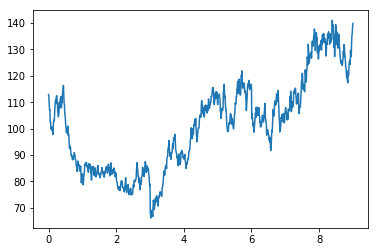

In [620]:
z = np.random.normal(size=number_of_step)
s = geometric_brownian_motion(z, t, s_0, mu, sigma)
s_real = real_stock_price_movement(s, t, r, dividends, t_dividends)
plt.plot(t, s_real)